In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [41]:
# build the path for rgb image files
project_root = Path.cwd()
# pathlib automatically uses the correct separator for the OS.
csv_dir_path = project_root / 'TrainedModelTestAccuracies'
print(f"Loading data from: {csv_dir_path}")

Loading data from: c:\Users\cokie\Workspace\GithubProjects\UrbanSatelliteAnalysis\TrainedModelTestAccuracies


In [42]:
msBasic_Df = pd.read_csv(csv_dir_path / 'MS_40epoch_BasicCNN_Accuracies.csv')
rgbBasic_Df = pd.read_csv(csv_dir_path / 'RGB_Basic_CNN_40epoch_Accuracies.csv')

msDeepest_Df = pd.read_csv(csv_dir_path / 'MS_40epoch_Deepest_CNN_Accuracies.csv')
rgbDeepest_Df = pd.read_csv(csv_dir_path / 'RGB_Deepest_40epoch_Accuracies.csv')

In [43]:
def getPlottableAccs(x_vals, y_vals):
    paired = zip(x_vals, y_vals)
    sortedPaired = sorted(paired)

    x_sorted, y_sorted = zip(*sortedPaired)

    return x_sorted, y_sorted

In [44]:
def plotTrainAccFeatures(msDf, title="title", xAxis="xAxis", yAxis="yAxis"):
    x_values = list(msDf.columns)
    x_values.remove("Category")
    x_values[x_values.index('model_init.pth')] = 'epoch_0.pth'
    x_values[x_values.index('model_fin.pth')] = 'epoch_' + str(len(x_values) - 1) + '.pth'
    x_values = [int((x.split("_"))[1].split(".")[0]) for x in x_values]

    featNames = msDf['Category']
    numFeats = len(featNames)
    for feat in range(numFeats):
        x_AC, y_AC = getPlottableAccs(x_values, list(msDf.iloc[feat])[1:])
        plt.plot(x_AC, y_AC, label=featNames[feat])

    plt.title(title)
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)
    plt.legend() # Display the legend to differentiate plots
    plt.grid(True)
    plt.show()

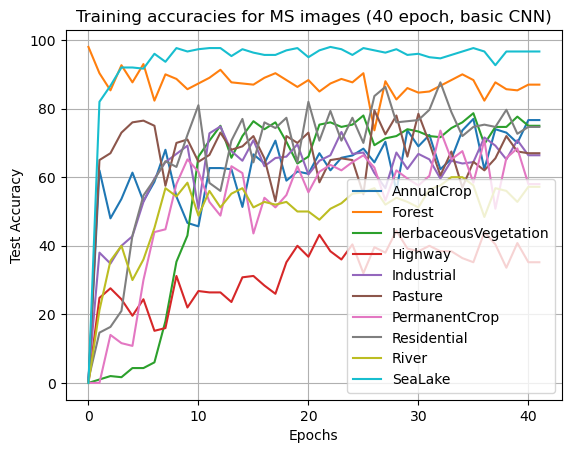

In [45]:
plotTrainAccFeatures(msBasic_Df, 'Training accuracies for MS images (40 epoch, basic CNN)', 'Epochs', 'Test Accuracy')

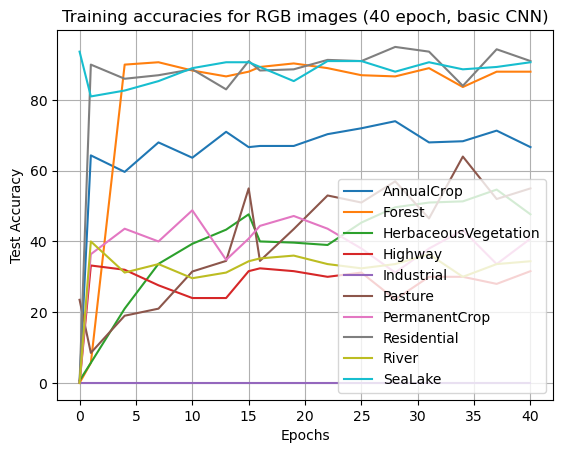

In [46]:
plotTrainAccFeatures(rgbBasic_Df, 'Training accuracies for RGB images (40 epoch, basic CNN)', 'Epochs', 'Test Accuracy')

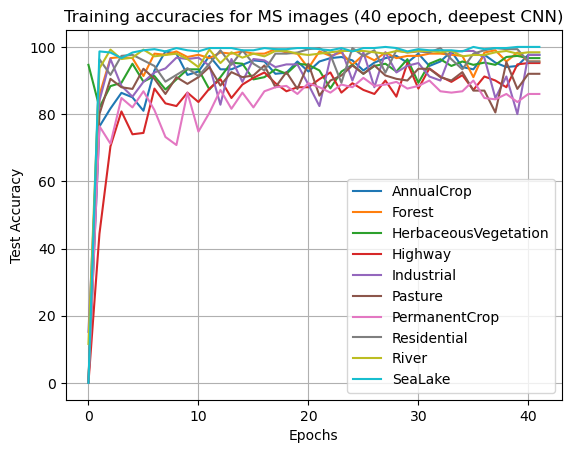

In [47]:
plotTrainAccFeatures(msDeepest_Df, 'Training accuracies for MS images (40 epoch, deepest CNN)', 'Epochs', 'Test Accuracy')

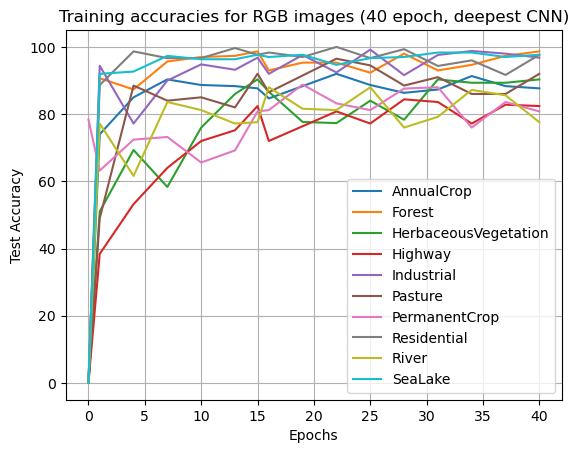

In [48]:
plotTrainAccFeatures(rgbDeepest_Df, 'Training accuracies for RGB images (40 epoch, deepest CNN)', 'Epochs', 'Test Accuracy')